## Observations and Insights 

25 mice were enrolled in each of the drug regimens.  All mice survived to complete the study, except for one that was undergoing the Stelasyn regimen.  The data for one mouse in the Propriva regimen was discarded due to data integrity issues.

The mice were split approximately equally between male and female (50.4% male vs. 49.6 female).

Of the four drug regimens selected for closer individual analysis, Capomulin and Ramicane displayed the lowest average final tumor volumes.  In addition, their lower bounds of final tumor volumes are much larger than each of their upper bounds, with some outliers lying below the lower bounds, and no outliers above the upper bounds.

This may indicate that these two drug regimens are significantly more effective on a smaller subset of the study group.  Follow on studies of Capomulin an Ramicane with larger populations may be able to provide a better indication.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [64]:
# Checking the number of mice.
print(f"There are {len(study_data_complete['Mouse ID'].unique())} mice enrolled in the study.")

There are 249 mice enrolled in the study.


In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupe_mice = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
dupe_mice

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [66]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID
dupe_mouse_id = 'g989'

# check the mouse data for ID
dupe_mouse_data = study_data_complete.loc[study_data_complete['Mouse ID'] == dupe_mouse_id]
dupe_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete[study_data_complete['Mouse ID'].isin(dupe_mice) == False]
study_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [68]:
# Checking the number of mice in the clean DataFrame.
print(f"There are {len(study_data_clean['Mouse ID'].unique())} mice in the clean study data.")

There are 248 mice in the clean study data.


## Summary Statistics

In [69]:
# My first attempt - doesn't use groupby, but it still works!

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor
# volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drugs = study_data_clean['Drug Regimen'].unique()

stats_dict = {'Drug Regimen': drugs,
              'Mean Tumor Volume': [],
              'Median Tumor Volume': [],
              'Tumor Volume Variance': [],
              'Tumor Volume Stdev': [],
              'Tumor Volume SEM': []}

for drug in drugs:
    vols = study_data_clean.loc[study_data_clean['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    stats_dict['Mean Tumor Volume'].append(np.mean(vols))
    stats_dict['Median Tumor Volume'].append(np.median(vols))
    stats_dict['Tumor Volume Variance'].append(np.var(vols))
    stats_dict['Tumor Volume Stdev'].append(np.std(vols))
    stats_dict['Tumor Volume SEM'].append(st.sem(vols))
    
summ_stats = pd.DataFrame(stats_dict)
summ_stats = summ_stats.set_index('Drug Regimen')
summ_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331


In [70]:
# Second attempt using groupby

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor
# volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series variable to hold Tumor Volume Data grouped by Drug Regimen

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
means = study_data_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
medians = study_data_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
variances = study_data_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
sds = study_data_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
sems = study_data_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Convert to DataFrame
summary_table = pd.DataFrame({
    'Mean Tumor Volume': means,
    'Median Tumor Volume': medians,
    'Tumor Volume Variance': variances,
    'Tumor Volume Std. Dev': sds,
    'Tumor Volume Std. Err.': sems
})

summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor
# volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table2 = study_data_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Preview DataFrame

summary_table2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [72]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# list of unique drug regimens
drugs = study_data_clean['Drug Regimen'].unique()

# drug regimen as x-axis values for plotting

# drop all duplicate mice
mouse_counts = study_data_clean.drop_duplicates(subset=['Mouse ID'])

# get mice counts per drug
drug_counts = mouse_counts['Drug Regimen'].value_counts()

mouse_counts



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


<function matplotlib.pyplot.show(close=None, block=None)>

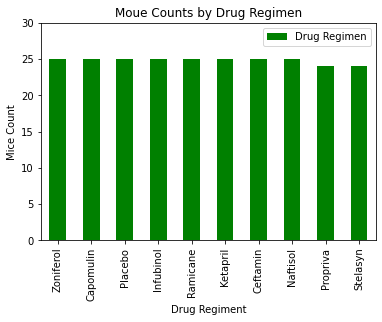

In [73]:
# plot the mouse counts for each drug using pandas
drug_counts.plot(kind='bar', color='green', title='Moue Counts by Drug Regimen', legend=True, ylim=(0,30))
plt.xlabel('Drug Regiment')
plt.ylabel('Mice Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

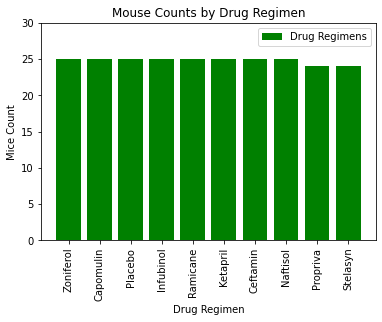

In [74]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
#plt.bar(mouse_counts['Drug Regimen'].unique(), mouse_counts['Drug Regimen'].value_counts(), color='green', label='Inline label')
plt.bar(drug_counts.index.values, drug_counts.values, color='green', label='Inline label')
plt.title('Mouse Counts by Drug Regimen')
plt.legend(['Drug Regimens'],loc=0)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.ylabel('Mice Count')
plt.ylim(0,30)
plt.show

Text(0.5, 1.0, 'Drug Regimen by Sex')

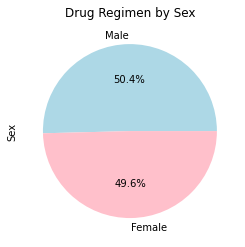

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = mouse_counts['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','pink']) # using light blue for better readability
plt.title('Drug Regimen by Sex')

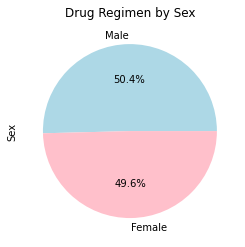

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts.values, labels=sex_counts.index.values, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.ylabel('Sex')
plt.title('Drug Regimen by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
finalists = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
study_data_CRIC = study_data_clean.loc[study_data_clean['Drug Regimen'].isin(finalists)]
study_data_CRIC.set_index(['Drug Regimen'])
#study_data_CRIC.value_counts('Drug Regimen')

# isolated view of just capomulin for later use
study_data_Cap = study_data_CRIC.loc[study_data_CRIC['Drug Regimen'] == 'Capomulin']
#study_data_Cap

# Reset index so drug regimen column persists after inner merge


# get mouse count per drug


# Start by getting the last (greatest) timepoint for each mouse
last_time = study_data_CRIC.groupby('Mouse ID')['Timepoint'].max()
last_time = last_time.reset_index()
last_time.head()


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [95]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_vols = last_time.merge(study_data_CRIC, on=['Mouse ID', 'Timepoint'], how='left')
# show all rows of data
pd.set_option('max_rows', None)
last_tumor_vols
#pd.reset_option('max_rows')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
5,a520,45,38.810366,1,Ramicane,Male,13,21
6,a577,30,57.031862,2,Infubinol,Female,6,25
7,a644,45,32.978522,1,Ramicane,Female,7,17
8,a685,45,66.083066,3,Infubinol,Male,8,30
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [96]:
# Reset max_rows
pd.reset_option('max_rows')

In [133]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
print(study_data_CRIC.head())
print()

drug_list = study_data_CRIC['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = study_data_CRIC.loc[study_data_CRIC['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    tumor_vol_list.append(final_tumor_vol)
    
    median = final_tumor_vol.median()
    quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lowerbound) | (final_tumor_vol > upperbound)]
    print(f"{drug}:")
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The the median of Tumor Volume is: {median}") 
    print(f"Values below {lowerbound} could be outliers.")
    print(f"Values above {upperbound} could be outliers.")
    print(f"potential outliers: \n{outliers}\n")
 

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      b128          0                45.0                 0    Capomulin   
29     c326          0                45.0                 0    Infubinol   
30     c139          0                45.0                 0    Infubinol   
31     v339          0                45.0                 0    Infubinol   
32     a577          0                45.0                 0    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female           9          22  
29  Female          18          25  
30    Male          11          28  
31    Male          20          26  
32  Female           6          25  

Capomulin:
The lower quartile of Tumor Volume is: 37.685932865
The upper quartile of Tumor Volume is: 45.0
The interquartile range of Tumor Volume is: 7.314067135000002
The the median of Tumor Volume is: 41.557808879999996
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outl

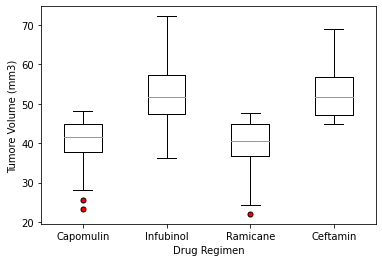

In [114]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_out = dict(markerfacecolor='red', markersize=5)
plt.boxplot(tumor_vol_list, labels=drug_list, flierprops=red_out)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumore Volume (mm3)')
plt.show()

## Line and Scatter Plots

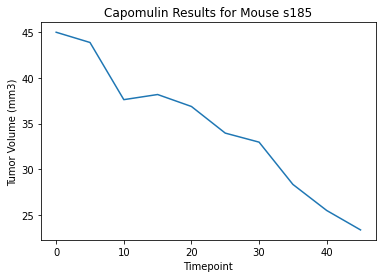

In [118]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# using study_data_Cap previously created
#study_data_Cap.head()

#change index to mouse ID 

#remove other mouse IDs so only s185 shows
mouse_data = study_data_Cap.loc[study_data_Cap['Mouse ID'] == 's185']


#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin Results for Mouse s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


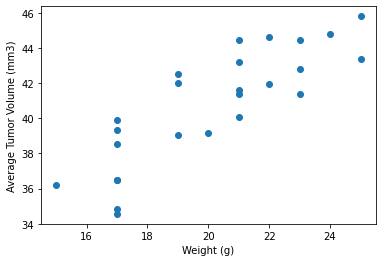

In [120]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume

# establish x-axis value for the weight of the mice
Cap_average = study_data_Cap.groupby('Mouse ID').mean()


# produce scatter plot of the data
#Cap_average.head()
plt.scatter(Cap_average['Weight (g)'], Cap_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the averge tumor volume is 0.84
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)


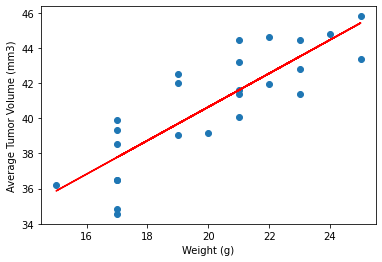

In [127]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
correlation = round(st.pearsonr(Cap_average['Weight (g)'], Cap_average['Tumor Volume (mm3)'])[0], 2)


#print St. Pearson Correlation Coefficient
print(f'The correlation between mouse weight and the averge tumor volume is {correlation:.2f}')

# establish linear regression values
model = linregress(Cap_average['Weight (g)'], Cap_average['Tumor Volume (mm3)'])

# linear regression line 
y_values = Cap_average['Weight (g)'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(Cap_average['Weight (g)'], Cap_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(Cap_average['Weight (g)'], y_values, color='red')

plt.show()
